<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/Annualized_Housing_Units_Started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Libraries**

In [2]:
!pip install fredapi

### **Import Libraries**

In [3]:
import os
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **FRED API**

In [4]:
fred = Fred(api_key=userdata.get('FRED'))

### **Get Data**

In [5]:
data_series = fred.get_series('HOUST')
df = data_series.to_frame(name='Starts')
df.index.name = 'Date'
df.index = pd.to_datetime(df.index)  # Fixed: pd.to_datetime instead of pd.DateTime
df.head()

Starts
Date              
1959-01-01  1657.0
1959-02-01  1667.0
1959-03-01  1620.0
1959-04-01  1590.0
1959-05-01  1498.0

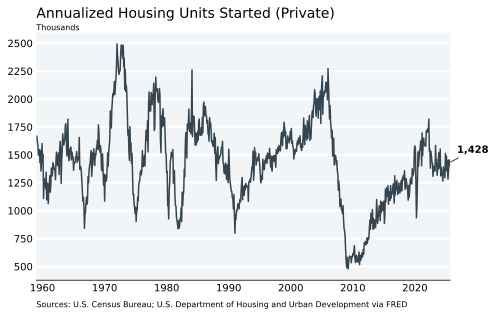

In [7]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.06, s='Annualized Housing Units Started (Private)', transform=ax.transAxes, size=14)
ax.text(0., 1.01, s='Thousands', transform=ax.transAxes, size=8)
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)


plt.plot(df.index, df['Starts'], color='#36454F')

# --- highlight latest value ---
x_last = df.index[-1]
y_last = df['Starts'].iloc[-1]

# dot on the last point
ax.scatter([x_last], [y_last], s=36, color='#36454F', zorder=5)

# leader line + value label above it
ax.annotate(f"{y_last:,.0f}",
            xy=(x_last, y_last),            # point to label
            xytext=(8, 8),                 # (x, y) offset in points
            textcoords='offset points',
            ha='left', va='bottom',
            fontsize=10, fontweight='bold',
            arrowprops=dict(arrowstyle='-', lw=1, color='#36454F'))

ax.set_xlim(df.index.min(), x_last + pd.DateOffset(months=2))

ax.annotate("Sources: U.S. Census Bureau; U.S. Department of Housing and Urban Development via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)
fig.savefig('./annualized_prive_housing_units.png')
plt.show()